# ReLU, softmax, early stopping
### Network 1

Construct a fully-connected network with two hidden layers of 50 neurons each with ReLU activation functions. Use a softmax output layer with cross-entropy cost function (these are MATLAB:s default settings). The precise layout is as follows:

$\bullet$ imageInputLayer

$\bullet$ fullyConnectedLayer of 50 neurons (followed by reluLayer)

$\bullet$ fullyConnectedLayer of 50 neurons (followed by reluLayer)

$\bullet$ fullyConnectedLayer of 10 neurons followed by softmaxLayer and classificationLayer
Train the network using stochastic gradient descent with Momentum = 0.9 (SGDM). Train for at most 400 epochs, MiniBatchSize = 8192 and InitialLearningRate = 0.001. Shuffle the training set before each epoch. Use ValidationPatience = 3 and ValidationFrequency = 30 on the validation set as indicators for early stopping. Use the trained network for calculating the classification errors for the training, validation, and test sets separately.

### Load data

In [9]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()




### Initalize network

In [29]:

#Network 1
batch_size = 8192
num_classes = 10
epochs = 400
initial_learning_rate = 0.001
momentum = 0.9
model_name = 'keras_cifar10_trained_model.h5'
input_shape = x_train.shape[1:]

# Normalize data.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

seed = 6
np.random.seed(seed)

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(lr = 0.005, decay=0, momentum=0.9, nesterov=False)


#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

model.summary()



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                153650    
_________________________________________________________________
activation_26 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
activation_27 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_28 (Activation)   (None, 10)               

### Fit the model

In [8]:
#Make a callback for early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3,restore_best_weights=True)
#mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0)
#Fit the model
model = model.fit(x_train,y_train,batch_size=batch_size, epochs = epochs, validation_data=(x_test,y_test),shuffle=True, callbacks=[es], verbose=1, validation_freq=3)


Train on 50000 samples, validate on 10000 samples
Epoch 1/400
50000/50000 [==============================] - 4s 74us/step - loss: 2.3297 - categorical_accuracy: 0.1173
Epoch 2/400


/home/edin/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 3s 69us/step - loss: 2.2702 - categorical_accuracy: 0.1549
Epoch 3/400
50000/50000 [==============================] - 4s 82us/step - loss: 2.2258 - categorical_accuracy: 0.1896 - val_loss: 2.1951 - val_categorical_accuracy: 0.2092
Epoch 4/400
50000/50000 [==============================] - 3s 70us/step - loss: 2.1817 - categorical_accuracy: 0.2208
Epoch 5/400
50000/50000 [==============================] - 3s 69us/step - loss: 2.1387 - categorical_accuracy: 0.2463
Epoch 6/400
50000/50000 [==============================] - 4s 83us/step - loss: 2.0984 - categorical_accuracy: 0.2620 - val_loss: 2.0706 - val_categorical_accuracy: 0.2713
Epoch 7/400
50000/50000 [==============================] - 3s 69us/step - loss: 2.0631 - categorical_accuracy: 0.2726
Epoch 8/400
50000/50000 [==============================] - 4s 71us/step - loss: 2.0331 - categorical_accuracy: 0.2852
Epoch 9/400
50000/50000 [==============================] - 4s 83us/step - loss

50000/50000 [==============================] - 4s 73us/step - loss: 1.6951 - categorical_accuracy: 0.4055
Epoch 62/400
50000/50000 [==============================] - 4s 79us/step - loss: 1.6916 - categorical_accuracy: 0.4096
Epoch 63/400
50000/50000 [==============================] - 4s 84us/step - loss: 1.6890 - categorical_accuracy: 0.4085 - val_loss: 1.6971 - val_categorical_accuracy: 0.4077
Epoch 64/400
50000/50000 [==============================] - 4s 72us/step - loss: 1.6874 - categorical_accuracy: 0.4091
Epoch 65/400
50000/50000 [==============================] - 4s 76us/step - loss: 1.6850 - categorical_accuracy: 0.4099
Epoch 66/400
50000/50000 [==============================] - 4s 85us/step - loss: 1.6825 - categorical_accuracy: 0.4111 - val_loss: 1.6886 - val_categorical_accuracy: 0.4114
Epoch 67/400
50000/50000 [==============================] - 4s 71us/step - loss: 1.6790 - categorical_accuracy: 0.4132
Epoch 68/400
50000/50000 [==============================] - 3s 69us/step

Epoch 121/400
50000/50000 [==============================] - 5s 97us/step - loss: 1.5776 - categorical_accuracy: 0.4491
Epoch 122/400
50000/50000 [==============================] - 5s 96us/step - loss: 1.5761 - categorical_accuracy: 0.4499
Epoch 123/400
50000/50000 [==============================] - 6s 111us/step - loss: 1.5762 - categorical_accuracy: 0.4479 - val_loss: 1.6016 - val_categorical_accuracy: 0.4362
Epoch 124/400
50000/50000 [==============================] - 5s 91us/step - loss: 1.5739 - categorical_accuracy: 0.4503
Epoch 125/400
50000/50000 [==============================] - 3s 69us/step - loss: 1.5753 - categorical_accuracy: 0.4489
Epoch 126/400
50000/50000 [==============================] - 4s 80us/step - loss: 1.5732 - categorical_accuracy: 0.4497 - val_loss: 1.5985 - val_categorical_accuracy: 0.4389
Epoch 127/400
50000/50000 [==============================] - 4s 70us/step - loss: 1.5695 - categorical_accuracy: 0.4520
Epoch 128/400
50000/50000 [========================

50000/50000 [==============================] - 4s 85us/step - loss: 1.5047 - categorical_accuracy: 0.4756 - val_loss: 1.5498 - val_categorical_accuracy: 0.4553
Epoch 181/400
50000/50000 [==============================] - 4s 72us/step - loss: 1.5030 - categorical_accuracy: 0.4766
Epoch 182/400
50000/50000 [==============================] - 4s 80us/step - loss: 1.5015 - categorical_accuracy: 0.4768
Epoch 183/400
50000/50000 [==============================] - 4s 85us/step - loss: 1.4997 - categorical_accuracy: 0.4779 - val_loss: 1.5449 - val_categorical_accuracy: 0.4563
Epoch 184/400
50000/50000 [==============================] - 4s 75us/step - loss: 1.4996 - categorical_accuracy: 0.4777
Epoch 185/400
50000/50000 [==============================] - 4s 76us/step - loss: 1.4994 - categorical_accuracy: 0.4775
Epoch 186/400
50000/50000 [==============================] - 4s 82us/step - loss: 1.4986 - categorical_accuracy: 0.4776 - val_loss: 1.5520 - val_categorical_accuracy: 0.4550
Epoch 187/40

50000/50000 [==============================] - 4s 74us/step - loss: 1.4440 - categorical_accuracy: 0.4967
Epoch 240/400
50000/50000 [==============================] - 4s 88us/step - loss: 1.4465 - categorical_accuracy: 0.4962 - val_loss: 1.5185 - val_categorical_accuracy: 0.4648
Epoch 241/400
50000/50000 [==============================] - 4s 90us/step - loss: 1.4469 - categorical_accuracy: 0.4967
Epoch 242/400
50000/50000 [==============================] - 4s 79us/step - loss: 1.4432 - categorical_accuracy: 0.4977
Epoch 243/400
50000/50000 [==============================] - 4s 73us/step - loss: 1.4411 - categorical_accuracy: 0.4991 - val_loss: 1.5015 - val_categorical_accuracy: 0.4720
Epoch 244/400
50000/50000 [==============================] - 4s 70us/step - loss: 1.4408 - categorical_accuracy: 0.4986
Epoch 245/400
50000/50000 [==============================] - 4s 71us/step - loss: 1.4423 - categorical_accuracy: 0.4968
Epoch 246/400
50000/50000 [==============================] - 4s 81

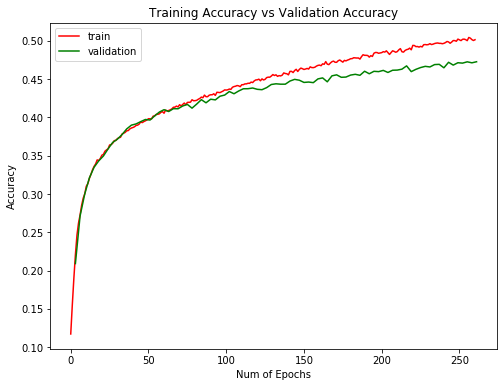

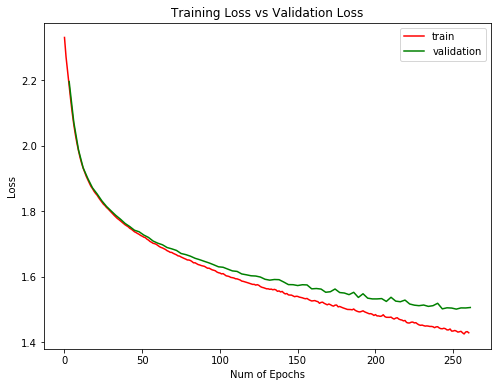

In [11]:

plt.figure(0)
plt.plot(model.history['categorical_accuracy'],'r')
m_accuracy =  model.history['val_categorical_accuracy']

plt.plot(np.arange(len(m_accuracy))*3+3,m_accuracy,'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(model.history['loss'],'r')
m_loss =  model.history['val_loss']
plt.plot(np.arange(len(m_loss))*3+3,m_loss,'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()



### Network 2
Construct a deep fully-connected network with three hidden layers of 50 neurons. Let the ReLU activation function (reluLayer) be applied to the output of the hidden layers. Use softmax outputs (softmaxLayer) and classify using a classificationLayer. Train the network on the training set for at most 400 epochs with Momentum = 0.9, MiniBatchSize = 8192, InitialLearningRate = 0.003, and ValidationPatience = 3, ValidationFrequency = 30. Shuffle the training set before each epoch. Calculate the classification errors obtained on the training, validation, and test sets separately. 

### Initalize network

In [12]:
#Network 2
batch_size = 8192
num_classes = 10
epochs = 400
initial_learning_rate = 0.01
momentum = 0.9
model_name = 'keras_cifar10_trained_model.h5'
input_shape = x_train.shape[1:]

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(lr = 0.005, decay=0, momentum=0.9, nesterov=False)


#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                153650    
_________________________________________________________________
activation_7 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_9 (Activation)    (None, 50)               

### Fit the model

In [13]:
#Make a callback for early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3,restore_best_weights=True)
#mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0)
#Fit the model
model = model.fit(x_train,y_train,batch_size=batch_size, epochs = epochs, validation_data=(x_test,y_test),shuffle=True, callbacks=[es], verbose=1, validation_freq=3)


Train on 50000 samples, validate on 10000 samples
Epoch 1/400
50000/50000 [==============================] - 4s 76us/step - loss: 2.3104 - categorical_accuracy: 0.1058
Epoch 2/400


/home/edin/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 3s 70us/step - loss: 2.2909 - categorical_accuracy: 0.1275
Epoch 3/400
50000/50000 [==============================] - 4s 83us/step - loss: 2.2717 - categorical_accuracy: 0.1584 - val_loss: 2.2562 - val_categorical_accuracy: 0.1894
Epoch 4/400
50000/50000 [==============================] - 4s 70us/step - loss: 2.2481 - categorical_accuracy: 0.1957
Epoch 5/400
50000/50000 [==============================] - 3s 69us/step - loss: 2.2197 - categorical_accuracy: 0.2082
Epoch 6/400
50000/50000 [==============================] - 4s 80us/step - loss: 2.1875 - categorical_accuracy: 0.2256 - val_loss: 2.1635 - val_categorical_accuracy: 0.2365
Epoch 7/400
50000/50000 [==============================] - 3s 69us/step - loss: 2.1518 - categorical_accuracy: 0.2364
Epoch 8/400
50000/50000 [==============================] - 3s 68us/step - loss: 2.1151 - categorical_accuracy: 0.2460
Epoch 9/400
50000/50000 [==============================] - 4s 86us/step - loss

50000/50000 [==============================] - 4s 71us/step - loss: 1.7015 - categorical_accuracy: 0.4023
Epoch 62/400
50000/50000 [==============================] - 4s 71us/step - loss: 1.6982 - categorical_accuracy: 0.4023
Epoch 63/400
50000/50000 [==============================] - 4s 83us/step - loss: 1.6967 - categorical_accuracy: 0.4017 - val_loss: 1.6945 - val_categorical_accuracy: 0.3985
Epoch 64/400
50000/50000 [==============================] - 4s 76us/step - loss: 1.6944 - categorical_accuracy: 0.4030
Epoch 65/400
50000/50000 [==============================] - 4s 72us/step - loss: 1.6880 - categorical_accuracy: 0.4062
Epoch 66/400
50000/50000 [==============================] - 4s 85us/step - loss: 1.6871 - categorical_accuracy: 0.4051 - val_loss: 1.6842 - val_categorical_accuracy: 0.4019
Epoch 67/400
50000/50000 [==============================] - 4s 71us/step - loss: 1.6832 - categorical_accuracy: 0.4070
Epoch 68/400
50000/50000 [==============================] - 4s 71us/step

Epoch 121/400
50000/50000 [==============================] - 4s 71us/step - loss: 1.5534 - categorical_accuracy: 0.4528
Epoch 122/400
50000/50000 [==============================] - 4s 73us/step - loss: 1.5572 - categorical_accuracy: 0.4499
Epoch 123/400
50000/50000 [==============================] - 4s 83us/step - loss: 1.5572 - categorical_accuracy: 0.4536 - val_loss: 1.5642 - val_categorical_accuracy: 0.4464
Epoch 124/400
50000/50000 [==============================] - 3s 69us/step - loss: 1.5463 - categorical_accuracy: 0.4574
Epoch 125/400
50000/50000 [==============================] - 4s 74us/step - loss: 1.5469 - categorical_accuracy: 0.4548
Epoch 126/400
50000/50000 [==============================] - 4s 85us/step - loss: 1.5460 - categorical_accuracy: 0.4555 - val_loss: 1.5663 - val_categorical_accuracy: 0.4458
Epoch 127/400
50000/50000 [==============================] - 4s 72us/step - loss: 1.5406 - categorical_accuracy: 0.4590
Epoch 128/400
50000/50000 [=========================

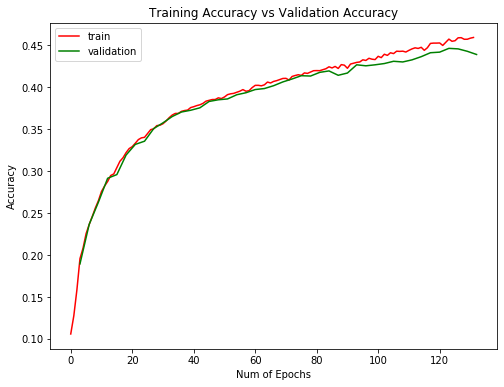

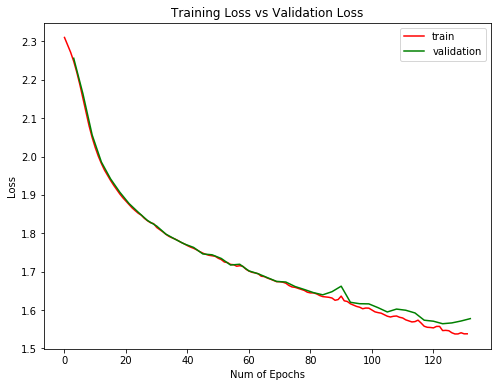

In [14]:
plt.figure(0)
plt.plot(model.history['categorical_accuracy'],'r')
m_accuracy =  model.history['val_categorical_accuracy']

plt.plot(np.arange(len(m_accuracy))*3+3,m_accuracy,'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(model.history['loss'],'r')
m_loss =  model.history['val_loss']
plt.plot(np.arange(len(m_loss))*3+3,m_loss,'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()


 Take Network 1 and tune the $L_2$-regularization parameter (L2Regularization) to 0.2. Train the network on the training set for at most 400 epochs with MiniBatchSize = 8192 and InitialLearningRate = 0.001. Use ValidationPatience = 3 and ValidationFrequency = 30 on the validation set as indicator for early stopping. Shuffle the training data before each epoch. Calculate the classification errors obtained on the training, validation, and test sets separately. 

## Initialize Network

In [10]:
from keras.regularizers import l2

#Network 3
batch_size = 8192
num_classes = 10
epochs = 400
initial_learning_rate = 0.001
momentum = 0.9
model_name = 'keras_cifar10_trained_model.h5'
input_shape = x_train.shape[1:]

# Normalize data.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

seed = 6
np.random.seed(seed)

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(50, kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(50, kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

sgd = SGD(lr = 0.005, decay=0, momentum=0.9, nesterov=False)


#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                153650    
_________________________________________________________________
activation_7 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_9 (Activation)    (None, 10)               

# Fit the model

In [11]:
#Make a callback for early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3,restore_best_weights=True)
#mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=0)
#Fit the model
model = model.fit(x_train,y_train,batch_size=batch_size, epochs = epochs, validation_data=(x_test,y_test),shuffle=True, callbacks=[es], verbose=1, validation_freq=3)


Train on 50000 samples, validate on 10000 samples
Epoch 1/400
50000/50000 [==============================] - 4s 80us/step - loss: 3.7951 - categorical_accuracy: 0.1173
Epoch 2/400


/home/edin/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 4s 71us/step - loss: 3.7258 - categorical_accuracy: 0.1548
Epoch 3/400
50000/50000 [==============================] - 4s 89us/step - loss: 3.6669 - categorical_accuracy: 0.1897 - val_loss: 3.6261 - val_categorical_accuracy: 0.2097
Epoch 4/400
50000/50000 [==============================] - 4s 72us/step - loss: 3.6067 - categorical_accuracy: 0.2211
Epoch 5/400
50000/50000 [==============================] - 4s 71us/step - loss: 3.5472 - categorical_accuracy: 0.2468
Epoch 6/400
50000/50000 [==============================] - 4s 85us/step - loss: 3.4903 - categorical_accuracy: 0.2608 - val_loss: 3.4520 - val_categorical_accuracy: 0.2721
Epoch 7/400
50000/50000 [==============================] - 4s 74us/step - loss: 3.4383 - categorical_accuracy: 0.2716
Epoch 8/400
50000/50000 [==============================] - 4s 77us/step - loss: 3.3917 - categorical_accuracy: 0.2844
Epoch 9/400
50000/50000 [==============================] - 5s 93us/step - loss

50000/50000 [==============================] - 4s 76us/step - loss: 2.4376 - categorical_accuracy: 0.3926
Epoch 62/400
50000/50000 [==============================] - 4s 71us/step - loss: 2.4267 - categorical_accuracy: 0.3957
Epoch 63/400
50000/50000 [==============================] - 4s 82us/step - loss: 2.4173 - categorical_accuracy: 0.3947 - val_loss: 2.4168 - val_categorical_accuracy: 0.3964
Epoch 64/400
50000/50000 [==============================] - 4s 80us/step - loss: 2.4089 - categorical_accuracy: 0.3954
Epoch 65/400
50000/50000 [==============================] - 4s 75us/step - loss: 2.3976 - categorical_accuracy: 0.3956
Epoch 66/400
50000/50000 [==============================] - 4s 86us/step - loss: 2.3883 - categorical_accuracy: 0.3987 - val_loss: 2.3853 - val_categorical_accuracy: 0.3955
Epoch 67/400
50000/50000 [==============================] - 4s 73us/step - loss: 2.3783 - categorical_accuracy: 0.3958
Epoch 68/400
50000/50000 [==============================] - 4s 74us/step

Epoch 121/400
50000/50000 [==============================] - 4s 71us/step - loss: 2.0207 - categorical_accuracy: 0.4228
Epoch 122/400
50000/50000 [==============================] - 4s 77us/step - loss: 2.0162 - categorical_accuracy: 0.4227
Epoch 123/400
50000/50000 [==============================] - 5s 91us/step - loss: 2.0132 - categorical_accuracy: 0.4215 - val_loss: 2.0193 - val_categorical_accuracy: 0.4166
Epoch 124/400
50000/50000 [==============================] - 4s 72us/step - loss: 2.0086 - categorical_accuracy: 0.4217
Epoch 125/400
50000/50000 [==============================] - 4s 71us/step - loss: 2.0069 - categorical_accuracy: 0.4220
Epoch 126/400
50000/50000 [==============================] - 4s 81us/step - loss: 2.0010 - categorical_accuracy: 0.4226 - val_loss: 2.0067 - val_categorical_accuracy: 0.4192
Epoch 127/400
50000/50000 [==============================] - 4s 77us/step - loss: 1.9957 - categorical_accuracy: 0.4243
Epoch 128/400
50000/50000 [=========================

50000/50000 [==============================] - 4s 86us/step - loss: 1.8338 - categorical_accuracy: 0.4401 - val_loss: 1.8475 - val_categorical_accuracy: 0.4289
Epoch 181/400
50000/50000 [==============================] - 4s 75us/step - loss: 1.8317 - categorical_accuracy: 0.4399
Epoch 182/400
50000/50000 [==============================] - 4s 75us/step - loss: 1.8291 - categorical_accuracy: 0.4394
Epoch 183/400
50000/50000 [==============================] - 4s 86us/step - loss: 1.8261 - categorical_accuracy: 0.4410 - val_loss: 1.8416 - val_categorical_accuracy: 0.4304
Epoch 184/400
50000/50000 [==============================] - 4s 71us/step - loss: 1.8248 - categorical_accuracy: 0.4400
Epoch 185/400
50000/50000 [==============================] - 4s 74us/step - loss: 1.8228 - categorical_accuracy: 0.4425
Epoch 186/400
50000/50000 [==============================] - 4s 87us/step - loss: 1.8198 - categorical_accuracy: 0.4417 - val_loss: 1.8349 - val_categorical_accuracy: 0.4338
Epoch 187/40

50000/50000 [==============================] - 4s 74us/step - loss: 1.7347 - categorical_accuracy: 0.4567
Epoch 240/400
50000/50000 [==============================] - 4s 82us/step - loss: 1.7337 - categorical_accuracy: 0.4555 - val_loss: 1.7588 - val_categorical_accuracy: 0.4425
Epoch 241/400
50000/50000 [==============================] - 4s 77us/step - loss: 1.7358 - categorical_accuracy: 0.4562
Epoch 242/400
50000/50000 [==============================] - 4s 75us/step - loss: 1.7322 - categorical_accuracy: 0.4571
Epoch 243/400
50000/50000 [==============================] - 4s 85us/step - loss: 1.7316 - categorical_accuracy: 0.4556 - val_loss: 1.7488 - val_categorical_accuracy: 0.4457
Epoch 244/400
50000/50000 [==============================] - 3s 70us/step - loss: 1.7296 - categorical_accuracy: 0.4575
Epoch 245/400
50000/50000 [==============================] - 3s 69us/step - loss: 1.7285 - categorical_accuracy: 0.4575
Epoch 246/400
50000/50000 [==============================] - 4s 80

50000/50000 [==============================] - 4s 74us/step - loss: 1.6770 - categorical_accuracy: 0.4696
Epoch 299/400
50000/50000 [==============================] - 4s 83us/step - loss: 1.6754 - categorical_accuracy: 0.4711
Epoch 300/400
50000/50000 [==============================] - 4s 84us/step - loss: 1.6731 - categorical_accuracy: 0.4703 - val_loss: 1.6997 - val_categorical_accuracy: 0.4591
Epoch 301/400
50000/50000 [==============================] - 4s 78us/step - loss: 1.6727 - categorical_accuracy: 0.4715
Epoch 302/400
50000/50000 [==============================] - 4s 77us/step - loss: 1.6730 - categorical_accuracy: 0.4706
Epoch 303/400
50000/50000 [==============================] - 4s 85us/step - loss: 1.6712 - categorical_accuracy: 0.4728 - val_loss: 1.6987 - val_categorical_accuracy: 0.4580
Epoch 304/400
50000/50000 [==============================] - 4s 73us/step - loss: 1.6723 - categorical_accuracy: 0.4721
Epoch 305/400
50000/50000 [==============================] - 4s 76

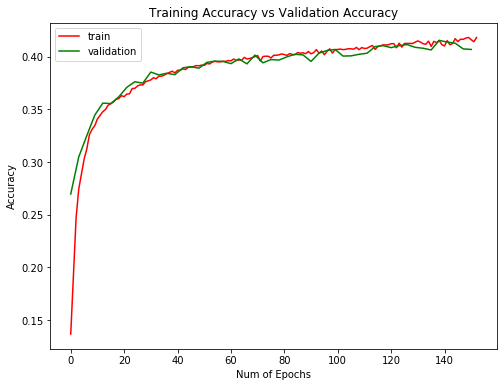

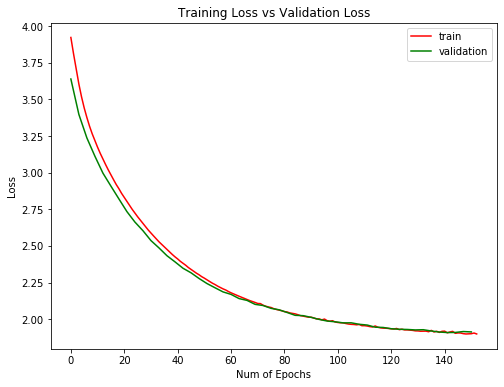

In [45]:
plt.figure(0)
plt.plot(model.history['categorical_accuracy'],'r')
m_accuracy =  model.history['val_categorical_accuracy']

plt.plot(np.arange(len(m_accuracy))*3,m_accuracy,'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(model.history['loss'],'r')
m_loss =  model.history['val_loss']
plt.plot(np.arange(len(m_loss))*3,m_loss,'g')
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()


# Conclusion

As you can see in the graphs network 1 and network 2 show a similar classification error,while network 2 was finished 50 episodes earlier.  This is because adding an additionalhidden  layer  significantly  increases  the  probability  of  overfitting.   Overfitting  can  bemigitated by tweeking the regularization, for example L2.  As you can see in network3,  simply tweaking L2 regularization increased the number of epochs highly,  showing that overfitting happened significantly later.  The network was able to learn longer and but did not deliver a better classification error, without a change of the networks layout. With additional tweaks it should be pi